In [65]:
from mpl_toolkits.basemap import Basemap
from numpy import ma
from livneh import tools as lt
from budyko import curves as bc
from matplotlib import colors
from matplotlib.mlab import bivariate_normal

In [66]:
tmp = np.load('./vic_wUS_PET.npz')

lats = tmp['lat']
lons = tmp['lon']
pet = tmp['pet']

data = pd.DataFrame({'frlat':lats,'frlon':lons,'pet':pet})

In [67]:
lats = np.unique(data.frlat)
lons = np.unique(data.frlon)

In [68]:
lats.sort()
lons.sort()
lats = lats[::-1]

In [69]:
def compute_x(frlon):
    indexer = np.abs(lons-frlon)
    return np.argmin(indexer)
    
def compute_y(frlat):
    indexer = np.abs(lats-frlat)
    return np.argmin(indexer)

In [70]:
data['x'] = data.frlon.map(compute_x)
data['y'] = data.frlat.map(compute_y)

In [71]:
y = len(lats)
x = len(lons)

tmp = np.random.randn(x*y)
tmp.shape = [y,x]
tmp[:] = -9999

In [72]:
def insert_value(df):
    x = df.x
    y = df.y
    val = df.pet
    
    tmp[y,x] = val

In [73]:
data.apply(insert_value,axis=1);

/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [74]:
pet_lats = np.unique(data.frlat)
pet_lons = np.unique(data.frlon)

In [75]:
tmp2 = ma.masked_values(tmp,-9999)
pet = np.flipud(tmp2)

In [76]:
tmp = np.load('./annual_GPM3B42_wUS.npz')

p = tmp['arr_0']
p = np.flipud(p)
p /= 1000.
p[np.isnan(p)==1] = -9999
p2 = ma.masked_values(p,-10000)

In [77]:
tmp = np.load('./annual_MOD16ET_wUS.npz')

et = tmp['arr_0']
et /= 1000.
et = np.flipud(et)
et[np.isnan(et)==1] = -9999
et2 = ma.masked_values(et,-10000)

In [78]:
tmp = np.load('./annual_MOD16PET_wUS.npz')

mod16pet = tmp['pet']
mod16pet /= 1000.
mod16pet = np.flipud(mod16pet)
mod16pet[np.isnan(mod16pet)==1] = -9999
mod16pet2 = ma.masked_values(mod16pet,-10000)

In [79]:
ei = et2/p2
ei_est = bc.budyko((p2,mod16pet2))

In [80]:
ba = ei-ei_est

In [81]:
rr = 1-(et2/p2)

In [82]:
# set up the plotting environment
lon_0 = pet_lons.mean()
lat_0 = pet_lats.mean()

m = Basemap(width=2500000,height=2500000,
            resolution='l',projection='aea',lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [83]:
pet_lons,pet_lats = np.meshgrid(pet_lons,pet_lats)
xi, yi = m(pet_lons, pet_lats)

In [84]:
yloc = np.max(yi)
xloc = np.min(xi)

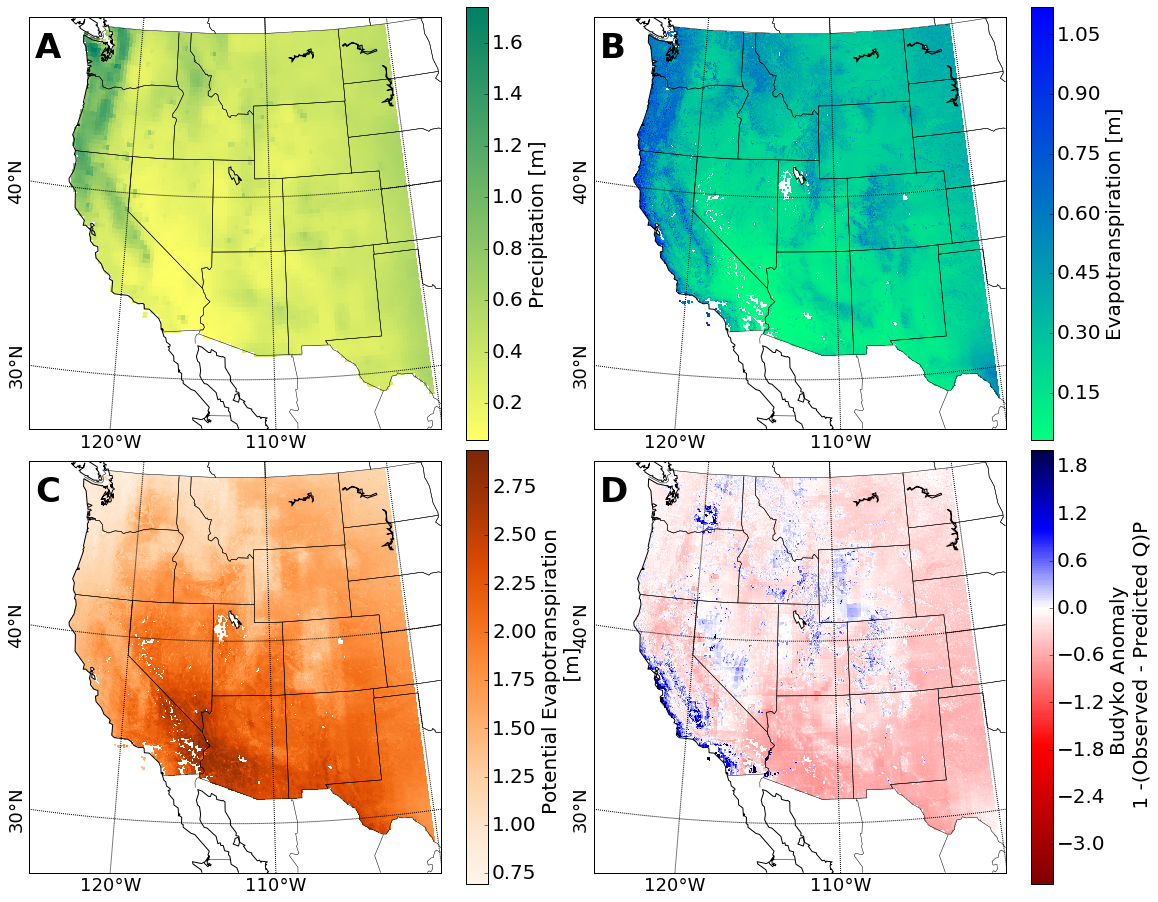

In [96]:
fs = 20
pfs = 18
rot = 90

fig = plt.figure(figsize=(16,12.5))

## Plot P
ax1 = fig.add_subplot(221)
cs = m.pcolor(xi,yi,p2,cmap='summer_r')
cb = plt.colorbar()
cb.set_label('Precipitation [m]', fontsize = fs)
cb.ax.tick_params(labelsize=fs)
# Add Grid Lines
mer = m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=pfs)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=pfs)
for n in mer:
    try:
        mer[n][1][0].set_rotation(rot)
    except:
        pass

plt.text(xloc,yloc-200000,'A', fontsize = 34, fontweight='bold')

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

ax2 = fig.add_subplot(222)
cs = m.pcolor(xi,yi,et2,cmap='winter_r')
cb = plt.colorbar()
cb.set_label('Evapotranspiration [m]', fontsize = fs)
cb.ax.tick_params(labelsize=fs)
# Add Grid Lines
mer = m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=pfs)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=pfs)
for n in mer:
    try:
        mer[n][1][0].set_rotation(rot)
    except:
        pass

plt.text(xloc,yloc-200000,'B', fontsize = 34, fontweight='bold')
# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

ax3 = fig.add_subplot(223)
cs = m.pcolor(xi,yi,mod16pet2,cmap='Oranges')
cb = plt.colorbar()
cb.set_label('Potential Evapotranspiration \n [m]', fontsize = fs)
cb.ax.tick_params(labelsize=fs)
# Add Grid Lines
mer = m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=pfs)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=pfs)
for n in mer:
    try:
        mer[n][1][0].set_rotation(rot)
    except:
        pass

plt.text(xloc,yloc-200000,'C', fontsize = 34, fontweight='bold')
# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

ax4 = fig.add_subplot(224)
cs = m.pcolor(xi,yi,ba,cmap='seismic_r',norm=MidpointNormalize(midpoint=0.),vmin=-3.5,vmax=2)
cb = plt.colorbar()
cb.set_label('Budyko Anomaly \n 1 -(Observed - Predicted Q)P', fontsize = fs)
cb.ax.tick_params(labelsize=fs)
# Add Grid Lines
mer = m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=pfs)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=pfs)
for n in mer:
    try:
        mer[n][1][0].set_rotation(rot)
    except:
        pass

plt.text(xloc,yloc-200000,'D', fontsize = 34, fontweight='bold')    
# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

fig.tight_layout();
plt.savefig('./figures/maps4.png',dpi=300)

In [86]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
colors

In [58]:
np.max(ba)

6.1135254

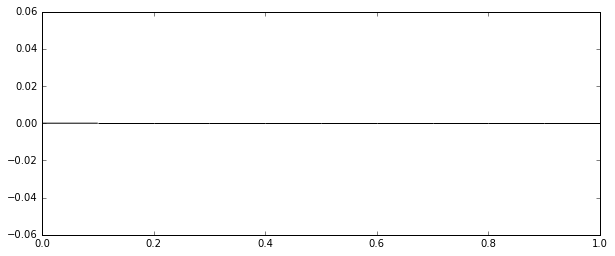

In [55]:
n,m = np.shape(ba)
plt.figure(figsize=(10,4))
ba2= ba.copy() 
ba2[ba2<100] = np.NaN
tmptmp = np.reshape(ba2,(m*n,1))[np.isnan(np.reshape(ba2,(m*n,1)))==0]
plt.hist(tmptmp);

In [52]:
from livneh import tools as lt

In [53]:
tmp = np.load('./vic_wUS_et_p.npz')

lat = tmp['lat']
lon = tmp['lon']
p = tmp['p']
et = tmp['et']

In [54]:
lats,lons,p = lt.pts2grid(lat,lon,p)

In [55]:
p

array([[ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
         -9.99900000e+03,   1.33503520e+00,   1.38318146e+00],
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
         -9.99900000e+03,   1.36245991e+00,   1.37674228e+00],
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
          1.35339069e+00,   1.35791553e+00,   1.37191631e+00],
       ..., 
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
          1.36665037e+00,   1.35382479e+00,   1.34477122e+00],
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
          1.35505866e+00,   1.36117325e+00,   1.36596793e+00],
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
          1.33354713e+00,   1.35042237e+00,   1.37069417e+00]])

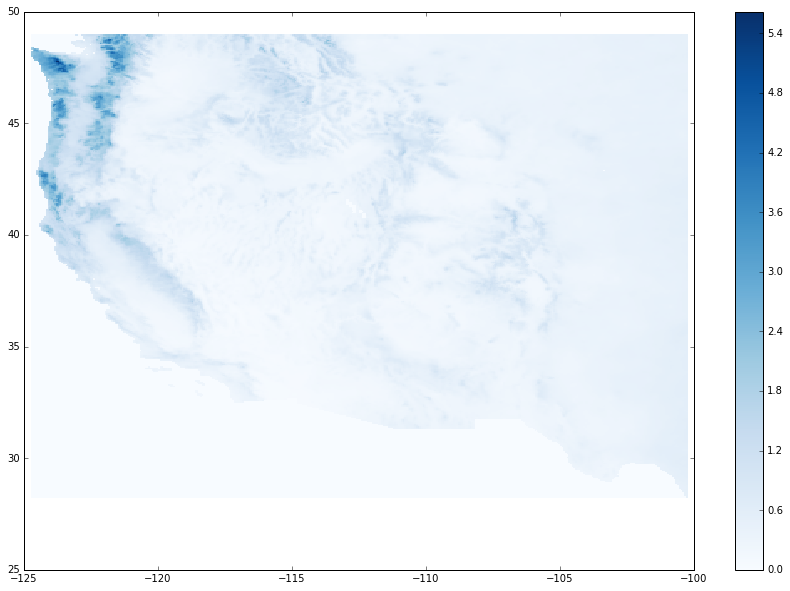

In [37]:
plt.figure(figsize=(15,10))
plt.pcolor(lats,lons,np.flipud(p)*365.25/1000,vmin=0, cmap='Blues')
plt.colorbar()

In [56]:
m,n = np.shape(p)
p2 = np.reshape(p,m*n)
p2 = p2[p2>0]

In [57]:
len(p2)

101709

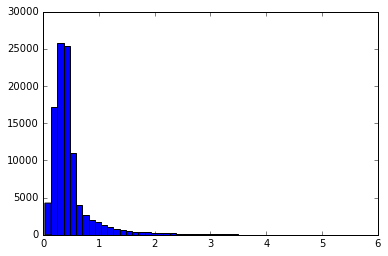

In [66]:
plt.hist(p2*365.25/1000,50);

In [ ]:
lt.pts2grid()

In [57]:
a = np.matrix([6,6,6,6])
b = np.matrix([2,2,2,2])

a/b

matrix([[3, 3, 3, 3]])

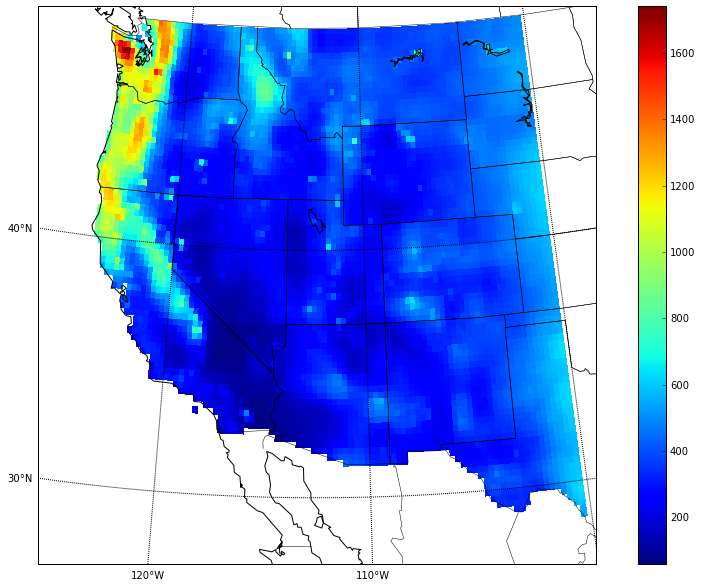

In [31]:
plt.figure(figsize=(15,10))
cs = m.pcolor(xi,yi,p2)
plt.colorbar()
# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()